# <span style='color: brown;'>Business Case: Jamboree Education - Linear Regression</span>

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


How can you help here?

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

# <span style='color: blue;'>Objective:</span>  
The goal is to provide insights into the graduate admissions process, particularly for Ivy League colleges, and to develop a predictive model that can estimate an individual's probability of admission based on various factors such as test scores (e.g., GMAT, GRE, SAT), academic performance, extracurricular activities, letters of recommendation, statement of purpose, and possibly other demographic or background information.

Overall, the goal is to provide Jamboree with actionable insights and a predictive tool that can assist students in assessing their chances of admission to Ivy League colleges and guide them in their college application process.

### Importing Required Libraries

In [542]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

### Loading the given data-set

In [543]:
df = pd.read_csv('D:\\Scaler\\Scaler\\Intro to ML\\Business Case\\Jamboree_Admission.csv')

In [544]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# <span style='color: blue;'>Exploratory data analysis (EDA):</span>  

* shape of data, data types, Identify & convert to categorical attributes, missing value detection, statistical summary

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [546]:
df.shape

(500, 9)

In [547]:
df.drop(["Serial No."],axis=1,inplace=True)

In [548]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [549]:
# Rename the column
df = df.rename(columns={'Chance of Admit ': 'Chance of Admit'})

#### As 'Chance of Admit ' consistes a spce at the end of word, Renamed it by removing the space

In [550]:
#checking for duplicates row
duplicate_rows = df[df.duplicated()]
duplicate_rows

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


#### Observation: No duplicate rows/records observed 

In [551]:
# check for missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Oservation: No missing value observed

In [552]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

#### Observation:
* University Rating,SOP,LOR,Research seems to be categorical variables as the number of unique values are very small.
* rest of the features are numeric and ordinal 
* University Rating, SOP, LOR, Research are discrete and rest are continuous
* SOP, University rating, LOR and research can be considered as numeric ordinal data.

In [553]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Observation:
* Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).
* Range of GRE score looks like between 290 to 340.
* Range of TOEFL score is between 92 to 120.
* University rating , SOP and LOR are distributed between range of 1 to 5.
* CGPA range is between 6.8 to 9.92.

## Identifying continous (numerical), categorical and target variable(s)

In [554]:
cat_var = ['University Rating', 'SOP', 'LOR ', 'Research']
num_var = ['GRE Score', 'TOEFL Score', 'CGPA']
target_var = 'Chance of Admit'

# <span style='color: blue;'>Detecting for Outliers:</span>  

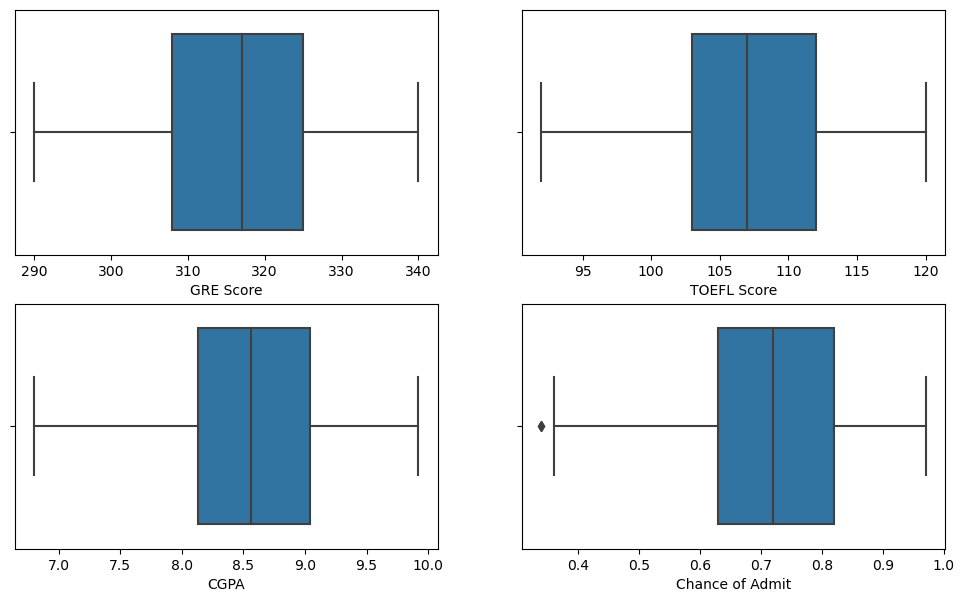

In [555]:
# Graphical Approach
# check for outliers using boxplots ()
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_var[index], data=df, ax=axs[0,index])
    index += 1
    
sns.boxplot(x=num_var[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target_var, data=df, ax=axs[1,1])
plt.show()

In [556]:
# Non-Graphical Approach
# Check for Outliers

def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"

for col in df.columns:
    print(col," : ",detect_outliers(df[col]))
    
detect_outliers(df)    

GRE Score  :  0.0 % Outliers data from input data found
TOEFL Score  :  0.0 % Outliers data from input data found
University Rating  :  0.0 % Outliers data from input data found
SOP  :  0.0 % Outliers data from input data found
LOR   :  0.024 % Outliers data from input data found
CGPA  :  0.0 % Outliers data from input data found
Research  :  0.44 % Outliers data from input data found
Chance of Admit  :  0.004 % Outliers data from input data found


'0.0 % Outliers data from input data found'

#### Observation:
There are no outliers present in the dataset.

# <span style='color: blue;'>Univariate Analysis</span>  

* Distribution plots of all the continuous variable(s) 
* Barplots/countplots of all the categorical variables

## <span style='color: blue;'>Distribution plots of all the continuous variable(s)</span>  


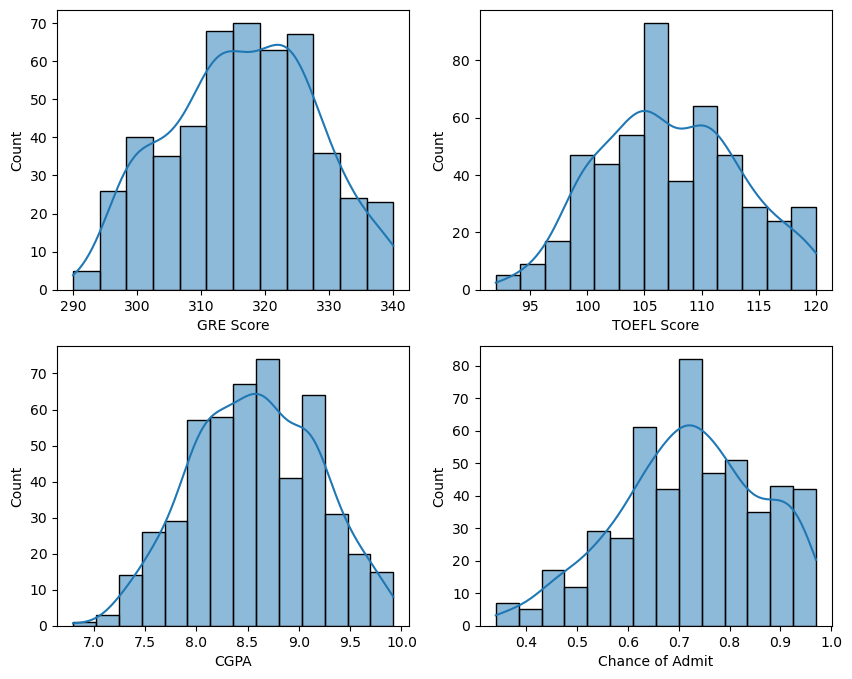

In [557]:
# check distribution of each continuous (numerical) variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(10, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_var[index]], kde=True, ax=axs[row,col])
        index += 1
    break
        
sns.histplot(df[num_var[-1]], kde=True, ax=axs[1,0])
sns.histplot(df[target_var], kde=True, ax=axs[1,1])
plt.show()

### Chance_of_Admit

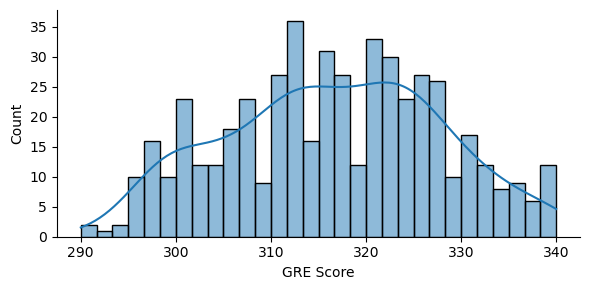

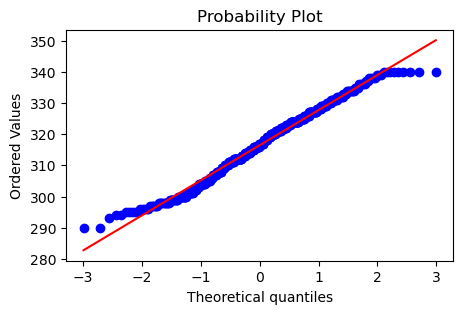

In [558]:
# Plotting distribution
sns.displot(df['GRE Score'], bins=30, kde=True, height=3, aspect=2)

# Plotting QQ plot
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust figsize as per your preference
stats.probplot(df['GRE Score'], dist="norm", plot=ax)
plt.show()

## GRE_Score

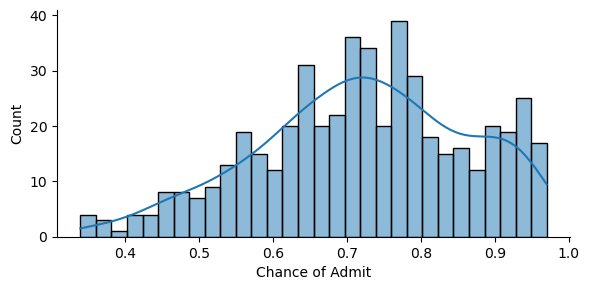

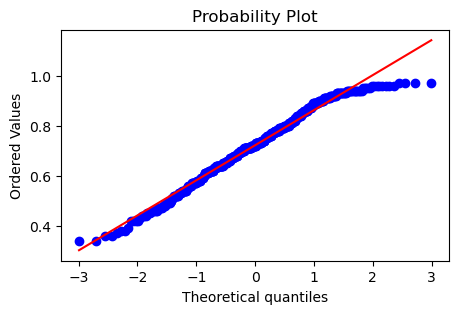

In [559]:
# Plotting distribution
sns.displot(df[target_var], bins=30, kde=True, height=3, aspect=2)

# Plotting QQ plot
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust figsize as per your preference
stats.probplot(df[target_var], dist="norm", plot=ax)
plt.show()

In [560]:
df1 = df.copy()

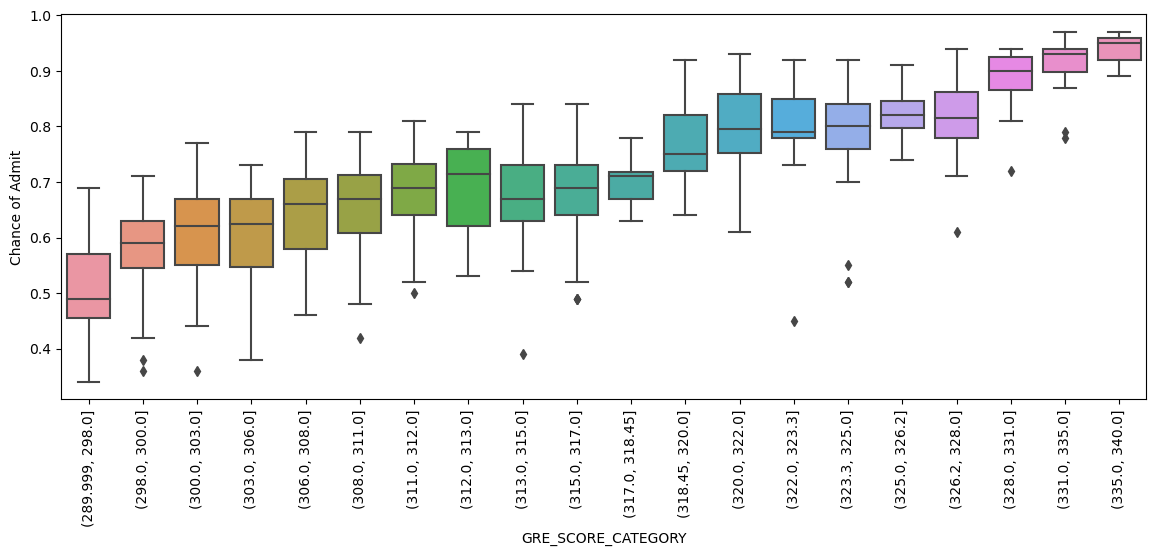

In [561]:
df1["GRE_SCORE_CATEGORY"]=pd.qcut(df1["GRE Score"],20)
plt.figure(figsize=(14,5))
sns.boxplot(y = df1["Chance of Admit"], x = df1["GRE_SCORE_CATEGORY"])
plt.xticks(rotation = 90)
plt.show()

#### Observation:
From above boxplot (distribution of chance of admition (probability of getting admition) as per GRE score ) :
with higher GRE score , there is high probability of getting an admition .

## TOEFL_Score

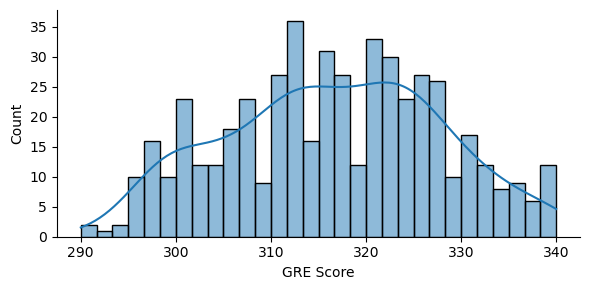

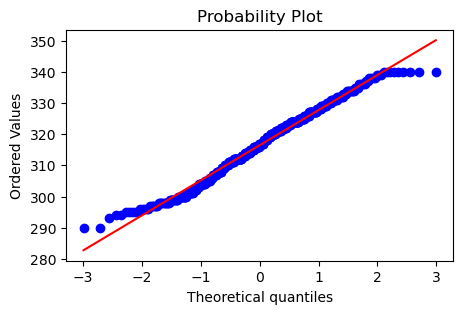

In [562]:
# Plotting distribution
sns.displot(df['GRE Score'], bins=30, kde=True, height=3, aspect=2)

# Plotting QQ plot
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust figsize as per your preference
stats.probplot(df['GRE Score'], dist="norm", plot=ax)
plt.show()

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

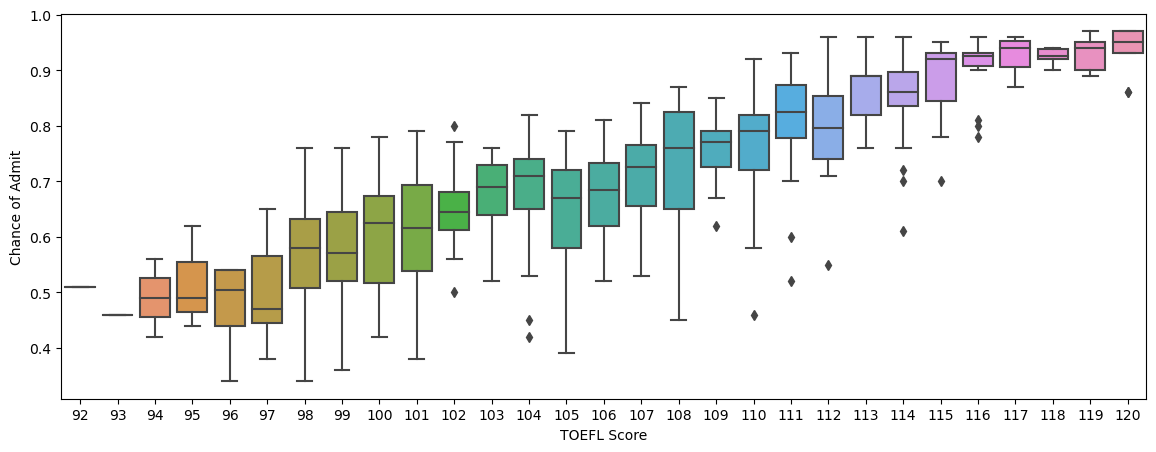

In [563]:
plt.figure(figsize=(14,5))
sns.boxplot(y = df["Chance of Admit"], x = df["TOEFL Score"])

#### Observation:
Students having high toefl score , has higher probability of getting admition .

## CGPA

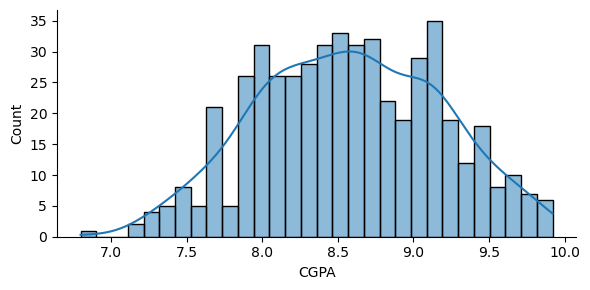

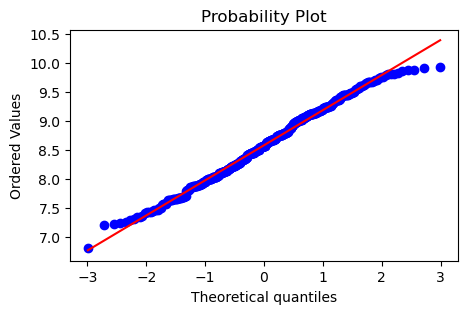

In [564]:
# Plotting distribution
sns.displot(df['CGPA'], bins=30, kde=True, height=3, aspect=2)

# Plotting QQ plot
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust figsize as per your preference
stats.probplot(df['CGPA'], dist="norm", plot=ax)
plt.show()

#### Observation:
Chance of admit and GRE score are nearly normally distrubted.

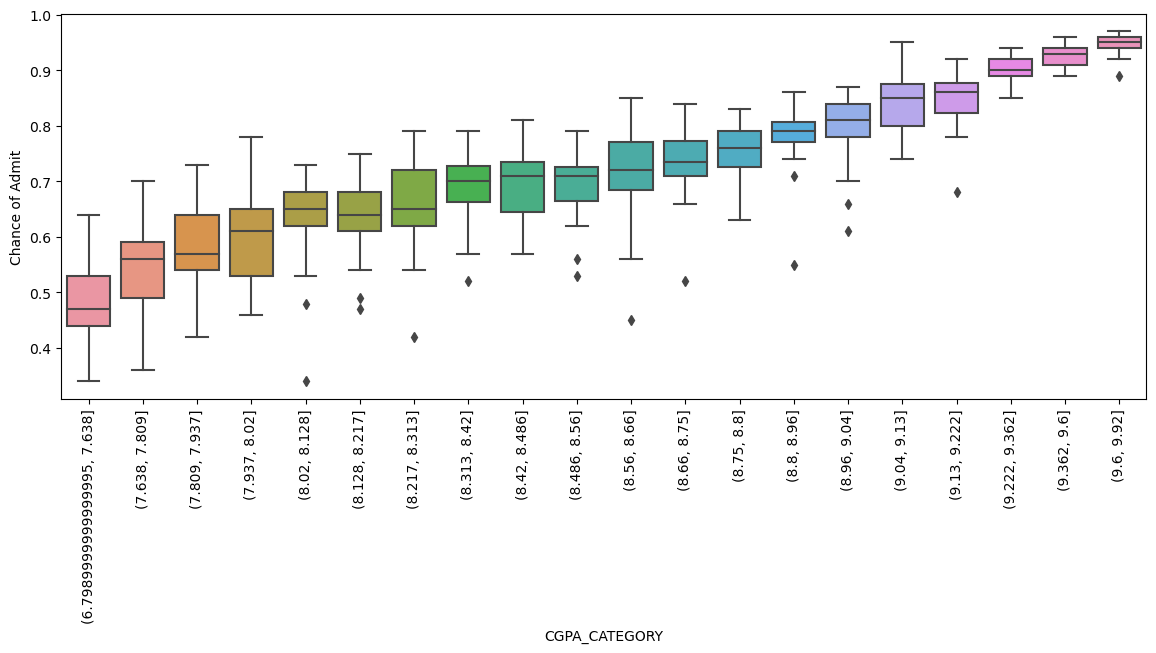

In [565]:
#plt.figure(figsize=(14,5))
#sns.boxplot(y = df["Chance of Admit"], x = df["CGPA"])

df1["CGPA_CATEGORY"]=pd.qcut(df1["CGPA"],20)
plt.figure(figsize=(14,5))
sns.boxplot(y = df1["Chance of Admit"], x = df1["CGPA_CATEGORY"])
plt.xticks(rotation = 90)
plt.show()

#### Observation:
Students having high CGPA score , has higher probability of getting admition 

#### Insight:
GRE score, TOEFL score and CGPA has a strong correlation with chance of addmission .

In [566]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

### <span style='color: blue;'>Barplots/countplots of all the categorical variables</span> 



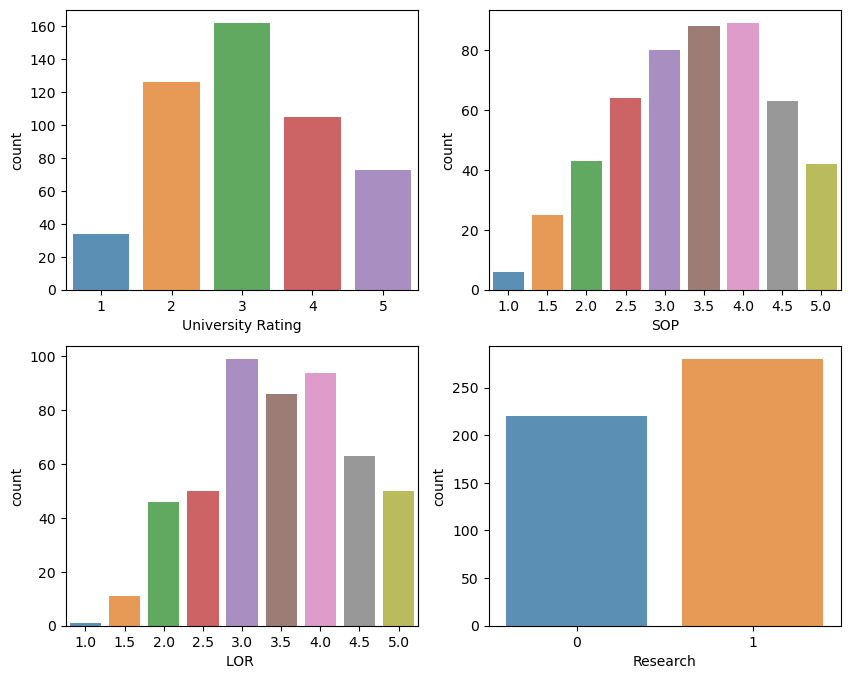

In [567]:
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 8))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_var[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1
        
plt.show()

# <span style='color: blue;'>Bivariate Analysis</span> 

## <span style='color: blue;'>Categorical features vis-a-vis Target variable boxplot</span> 

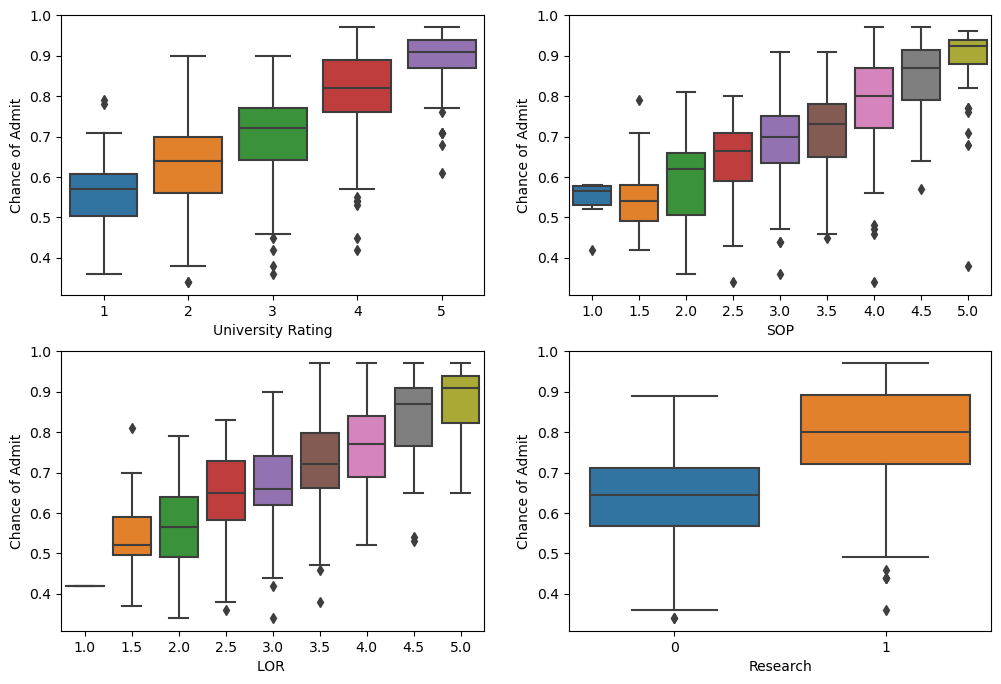

In [568]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(12,8))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_var[index], y=target_var, data=df, ax=axs[row,col])
        index += 1

#### Observation:
* Upon examination of the preceding plots, it becomes evident that the strength of the Statement of Purpose (SOP) is positively associated with the Chance of Admission.
* Similarly, a comparable pattern emerges with both the strength of the Letter of Recommendation and University rating, indicating a positive correlation with the Chance of Admission.
* Students engaged in research demonstrate a higher likelihood of admission. However, it is worth noting the presence of outliers within this category.

## <span style='color: blue;'>Checking the overall linearity and correlation among all features through a pairplot</span> 

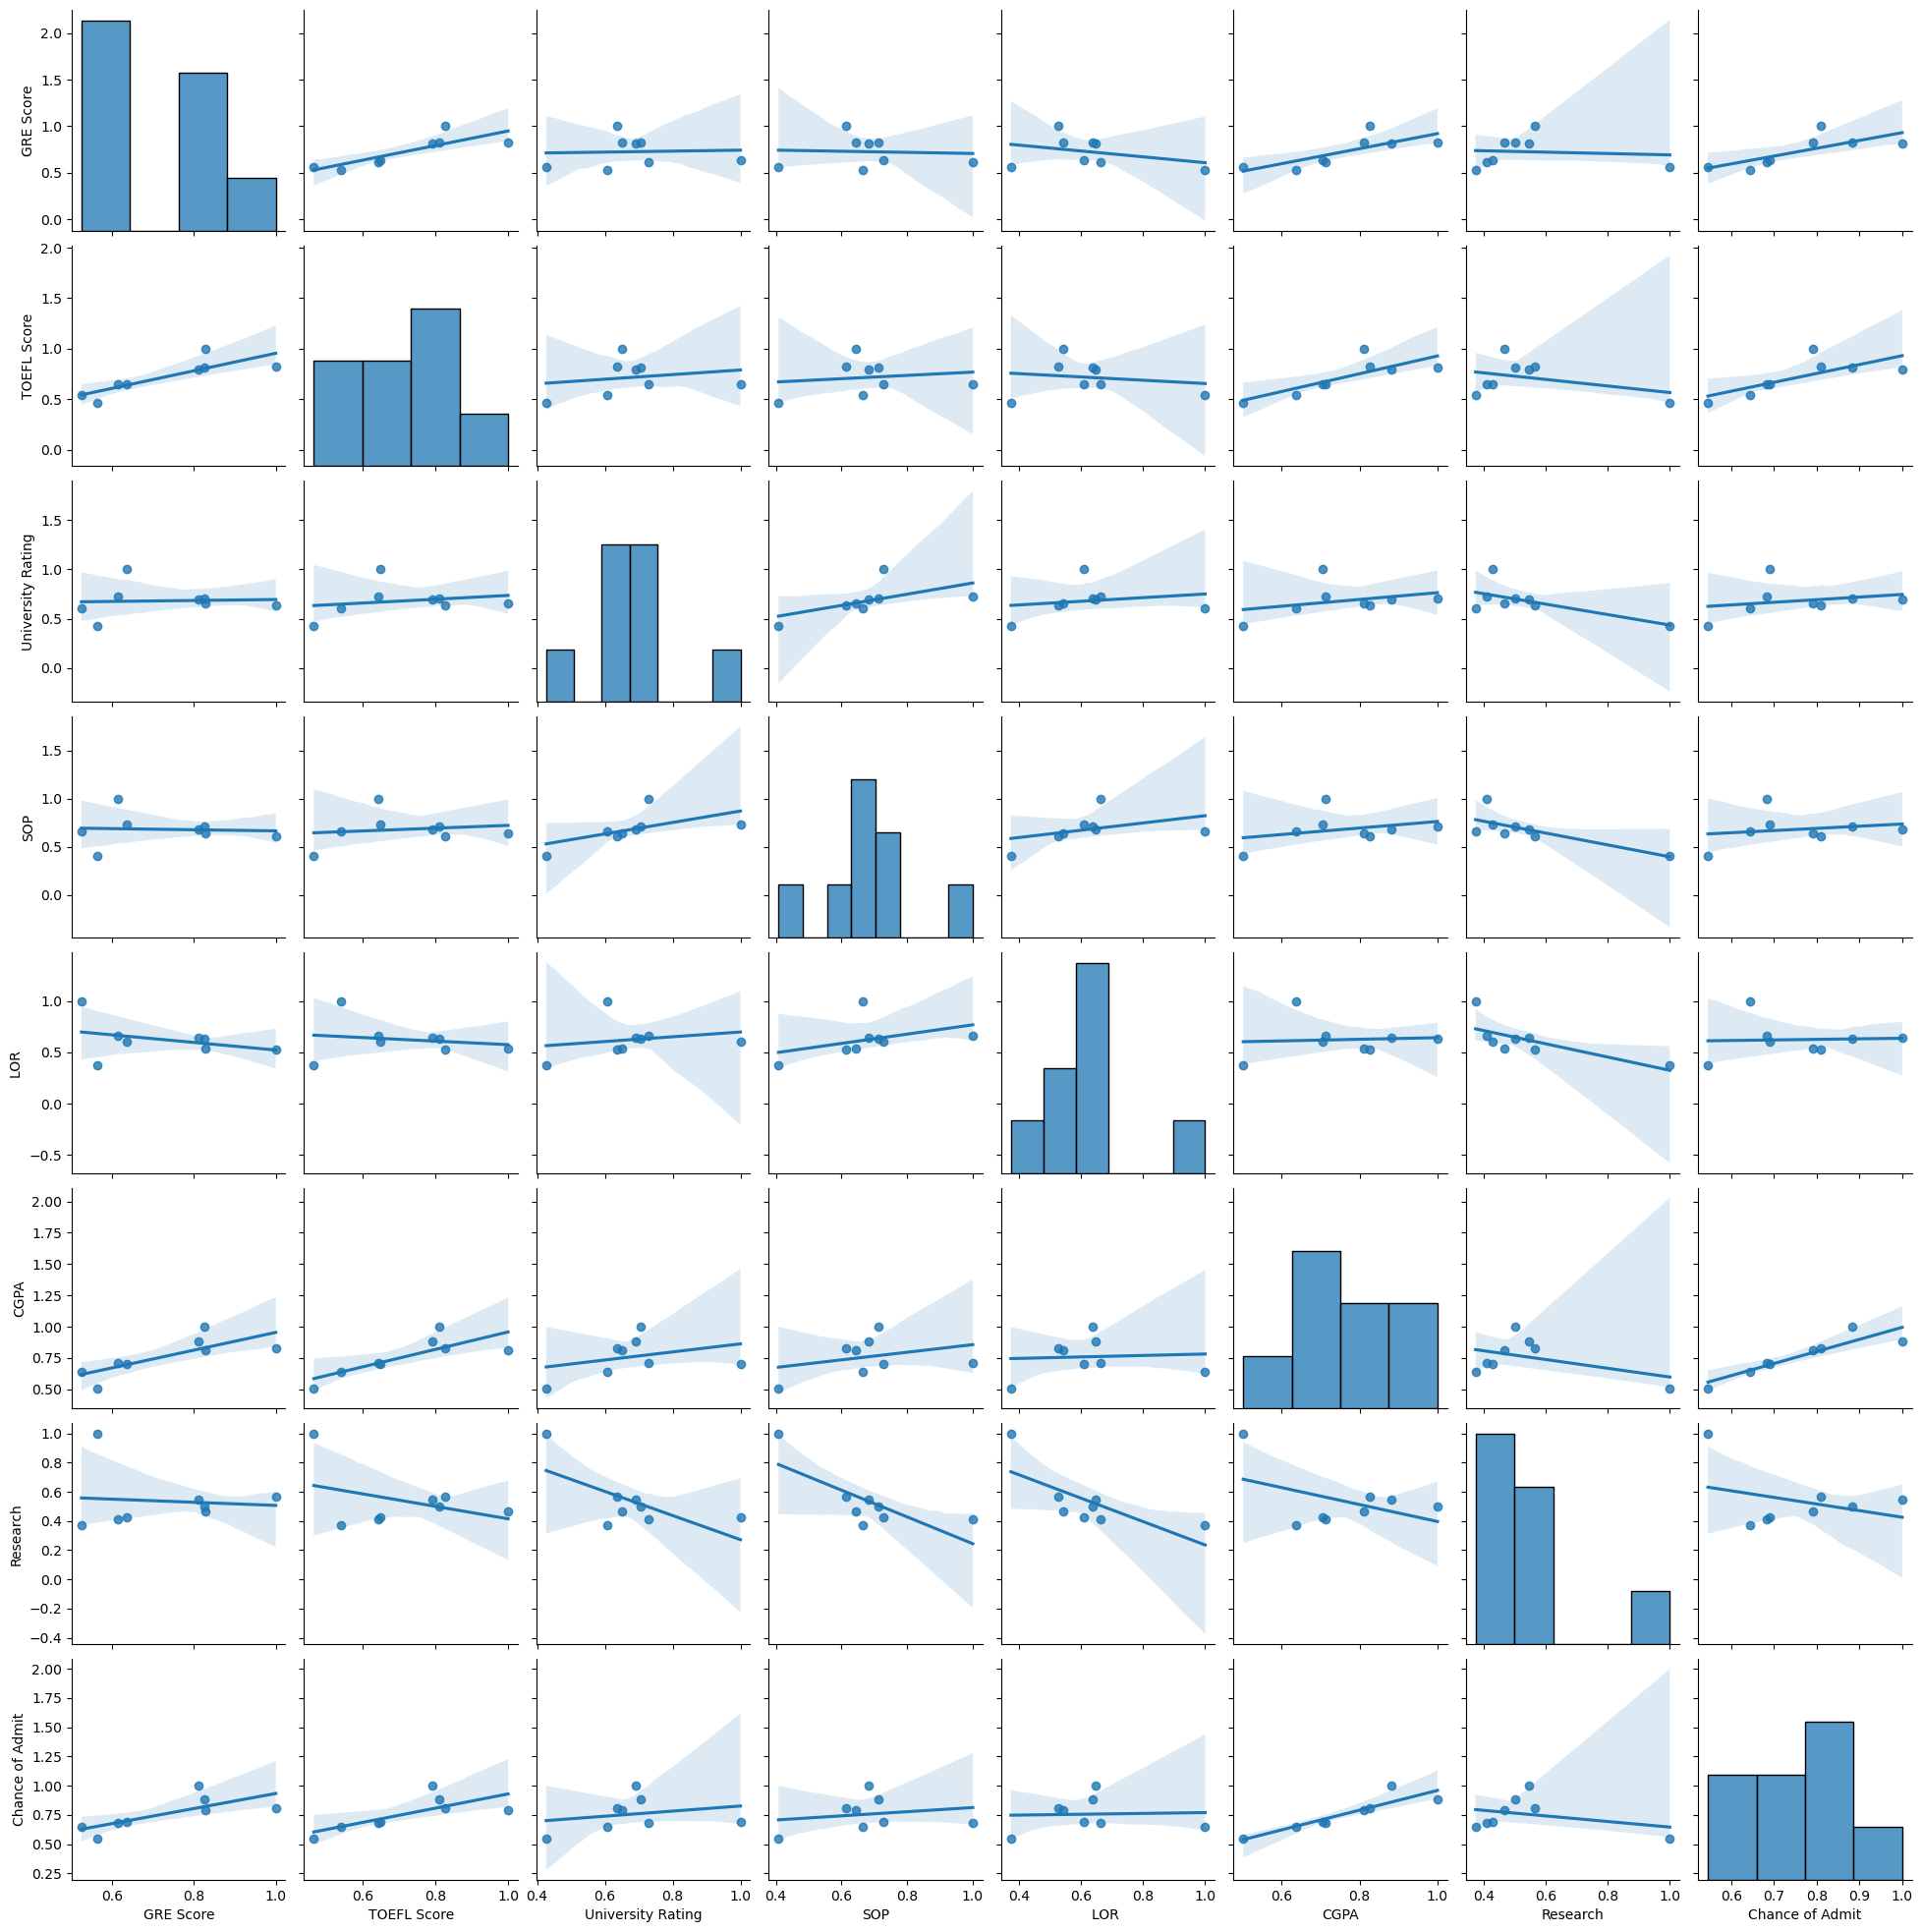

In [569]:
sns.pairplot(df.corr(),kind= 'reg')

## Overall look at correlation:

<Axes: >

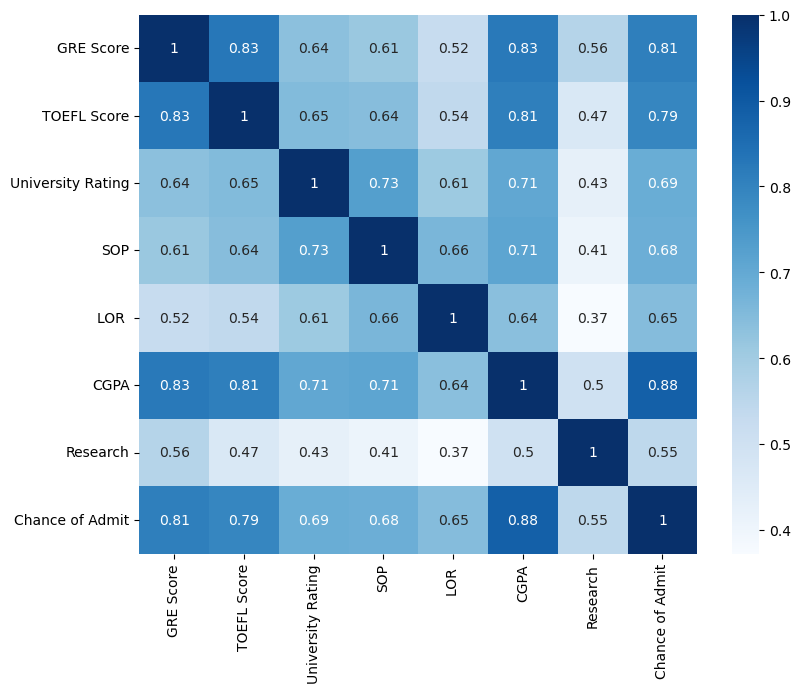

In [570]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap = "Blues")

#### Observation:
Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

Target/Dependent Variable : Chance of Admit (the value we want to predict)

from above correlation heatmap , we can observe GRE score TOEFL score and CGPA have very high correlation with Change of admission.

University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.

## <span style='color: blue;'>Checking Linearity of all the features/variables correlating with Target variable (chance of admit)</span> 


GRE Score


<Figure size 200x200 with 0 Axes>

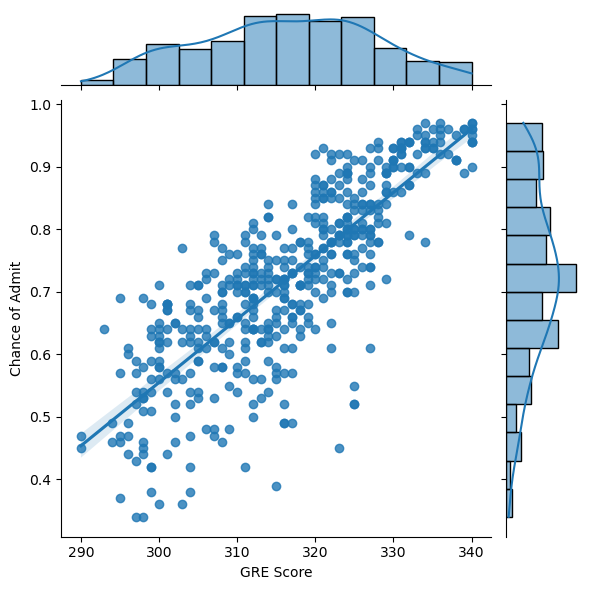

TOEFL Score


<Figure size 200x200 with 0 Axes>

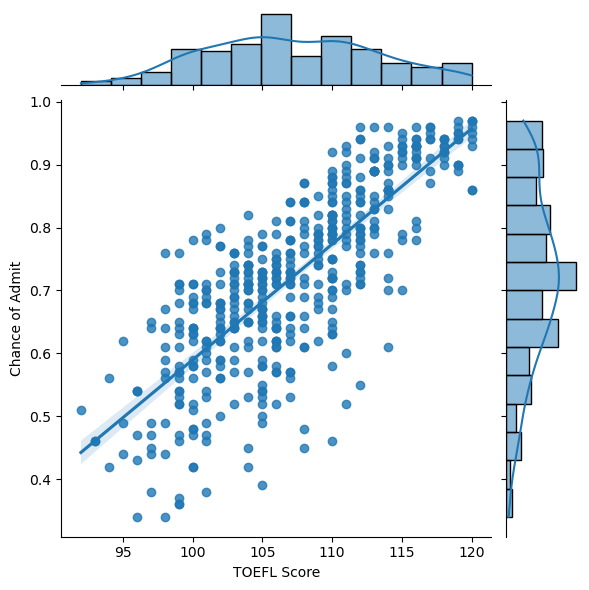

University Rating


<Figure size 200x200 with 0 Axes>

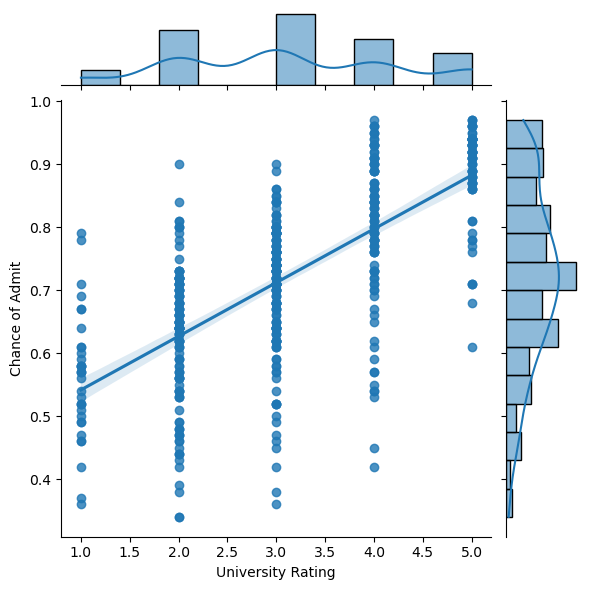

SOP


<Figure size 200x200 with 0 Axes>

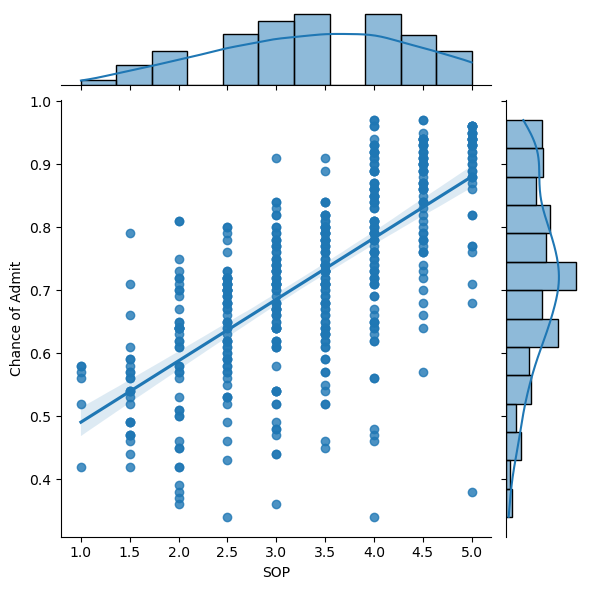

LOR 


<Figure size 200x200 with 0 Axes>

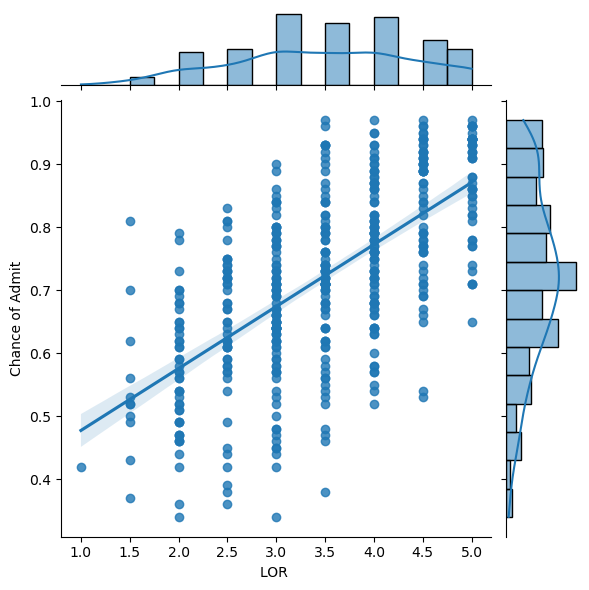

CGPA


<Figure size 200x200 with 0 Axes>

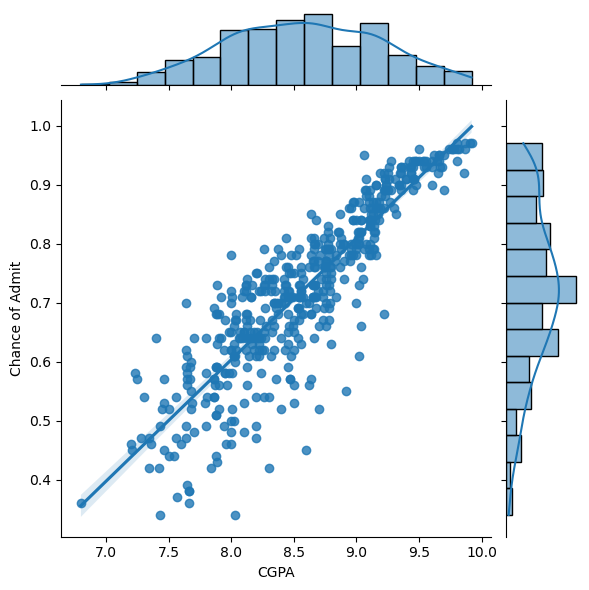

Research


<Figure size 200x200 with 0 Axes>

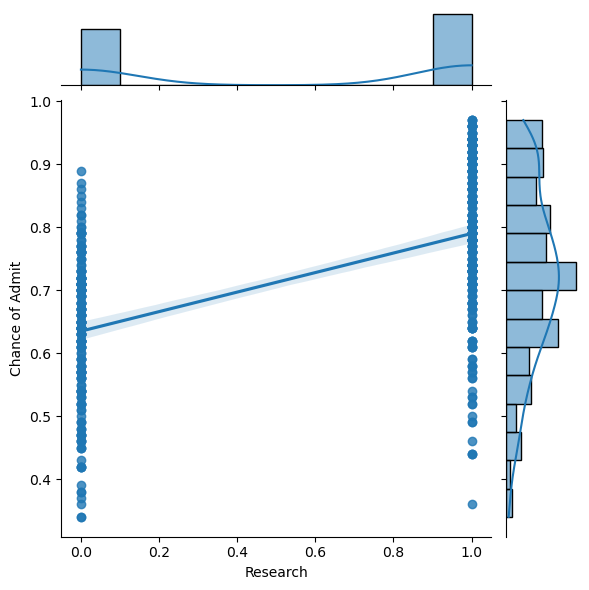

Chance of Admit


<Figure size 200x200 with 0 Axes>

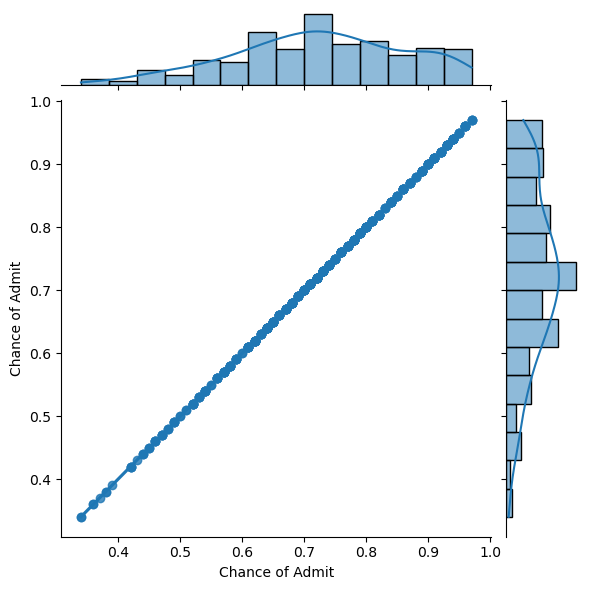

In [571]:
for col in df.columns:
    print(col)
    plt.figure(figsize=(2, 2))  # Adjust width and height as per your preference
    sns.jointplot(x=col, y=target_var, data=df, kind="reg")
    plt.show()

In [572]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

# <span style='color: blue;'>Model Building </span> 
# <span style='color: blue;'>Predicting Graduate Admission Chances: A Linear Regression Approach </span> 


In [573]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression

In [574]:
X = df.drop(["Chance of Admit"],axis = 1)  # independent variables
y = df["Chance of Admit"].values.reshape(-1,1) # target / dependent variables

## Standardising data

In [575]:
standardizer = StandardScaler()   
standardizer.fit(X)
x = standardizer.transform(X)  # standardising the data

### test train spliting :

In [576]:
X_train , X_test, y_train , y_test = train_test_split(x,y,
                                                     random_state = 1,
                                                      test_size = 0.2 
                                                     )                         # test train split 

In [577]:
X_train.shape,X_test.shape  # after spliting, checking for the shape of test and  train data

((400, 7), (100, 7))

In [578]:
y_train.shape, y_test.shape

((400, 1), (100, 1))

### Training the model

In [579]:
LinearRegression = LinearRegression()    # training LinearRegression model 
LinearRegression.fit(X_train,y_train)

LinearRegression()

In [580]:
y_pred_train = LinearRegression.predict(X_train)    # training LinearRegression model 

y_pred_test = LinearRegression.predict(X_test)

### r2 score on train data:

In [581]:
r2_score(y_train,y_pred_train )

0.8215099192361265

### r2 score on test data:

In [582]:
r2_score(y_test,y_pred_test )

0.8208741703103732

# <span style='color: blue;'>Model Co-efficients and Intercept with all the features (column names)</span> 

In [583]:
ws = pd.DataFrame(LinearRegression.coef_.reshape(1,-1),columns=df.columns[:-1])
ws["Intercept"] = LinearRegression.intercept_
ws

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [584]:
LinearRegression_Model_coefs = ws
LinearRegression_Model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [585]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [586]:
y_pred = LinearRegression.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.0034590988971363833
RMSE: 0.058814104576507695
MAE : 0.040200193804157944
r2_score: 0.8208741703103732
Adjusted R2 score : 0.8183256320830818


## Assumptions of linear regression
1. Multicollinearity Check: The independent variables should not be highly correlated with each other
2. Residual Mean Close to Zero: The mean of the residuals should be close to zero, indicating that the model is unbiased
3. Linearity of Variables: The relationship between the independent and dependent variables should be approximately linear
4. Homoscedasticity Test: The variance of the residuals should be constant across all levels of the independent variables
5. Normality of Residuals: The residuals (errors) should be normally distributed around zero

## <span style='color: blue;'>1. Multicollinearity Check: Evaluating Variance Inflation Factor (VIF) scores</span> 


In [587]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

In [588]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [589]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


In [590]:
# drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [591]:
# Now dropping the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [592]:
# dropping the LOR
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR '], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [593]:
# finally dropping the University Rating
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


### Observation:  
* Multicollinearity is present in the data
* There are two features left -  CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit

## <span style='color: blue;'>2. Residual Mean Close to Zero</span> 


In [594]:
residuals1 = y_test - y_pred_test
residuals1 = residuals1.reshape((-1,))
print('Mean of Residuals: ', residuals1.mean())


Mean of Residuals:  -0.005706590389232245


### Observation: Since the mean of residuals is very close to 0, we can say that the model is unbiased

## <span style='color: blue;'>3. Linearity of Variables</span> 

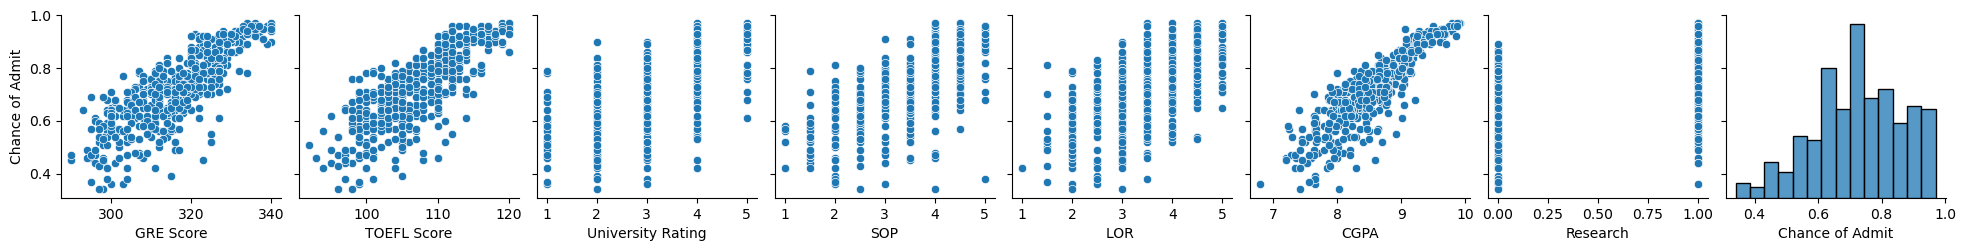

In [595]:
sns.pairplot(df,y_vars = ["Chance of Admit"])
plt.show()

#### Observation: GRE score, TOEFL score and CGPA have very high correlation with Change of admission

## <span style='color: blue;'> 4. Test of homoscedasticity</span> 


In [596]:
y_predicted = LinearRegression.predict(X_train)
y_predicted.shape
residuals = (y_train - y_predicted)

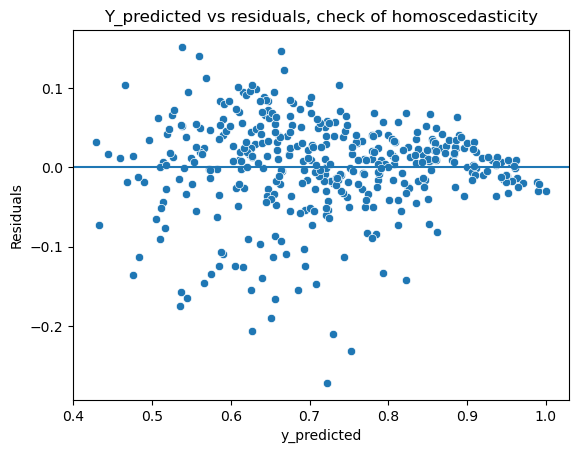

In [597]:
# Test of homoscedasticity
sns.scatterplot(x=y_predicted.reshape(-1,), y=residuals.reshape(-1,))
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.title("Y_predicted vs residuals, check of homoscedasticity")
plt.show()

#### Observation: Since we do not see any significant change in the spread of residuals (the plot is not creating a cone type shape),  We can coclude that homoscedasticity is met

## <span style='color: blue;'> 5. Normality of Residuals</span> 

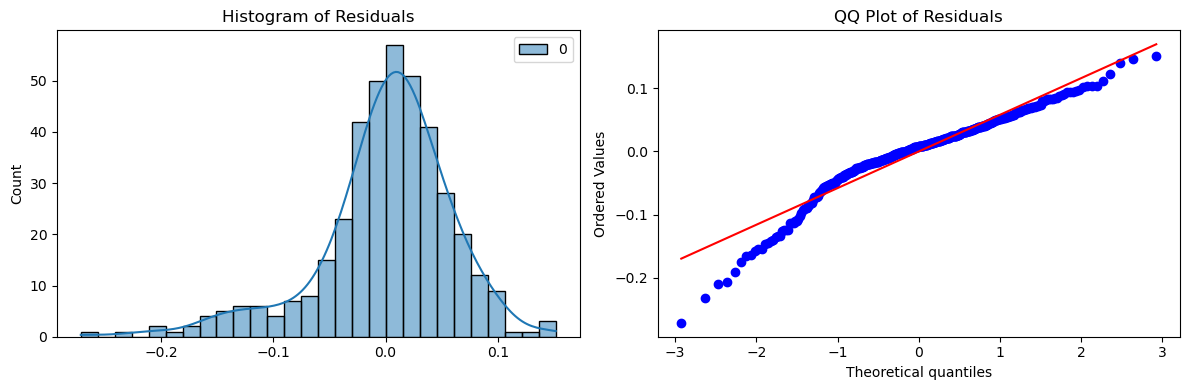

In [598]:
residuals = (y_train - y_predicted)

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')

# Plot QQ plot of residuals
stats.probplot(residuals.reshape(-1,), plot=axes[1])
axes[1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

#### Observation:
* The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution
* The QQ plot shows that residuals are slightly deviating from the straight diagonal.

# <span style='color: blue;'> Model Regularisation</span> 


In [599]:
from sklearn.linear_model import Ridge  # L2 regualrization
from sklearn.linear_model import Lasso  # L1 regualrization 
from sklearn.linear_model import ElasticNet

## <span style='color: blue;'>L2 Regularization (Ridge Regularization)</span> 

In [600]:
## Hyperparameter Tuning : for appropriate lambda value : 

train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 =  []
lambda_ = 0
while lambda_ <= 5:
    lambdas.append(lambda_)
    RidgeModel = Ridge(lambda_)
    RidgeModel.fit(X_train,y_train)
    trainR2 = RidgeModel.score(X_train,y_train)
    testR2 = RidgeModel.score(X_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)
    
    lambda_ += 0.01  

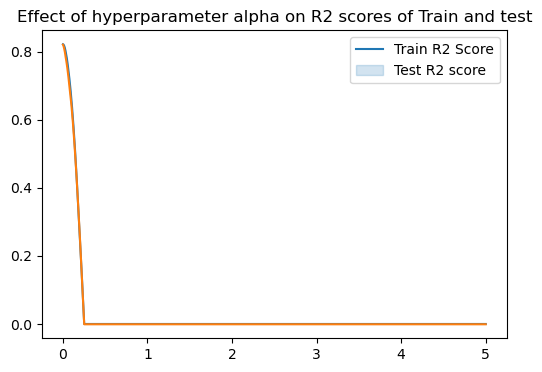

In [640]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=lambdas, y=train_R2_score)
sns.lineplot(x=lambdas, y=test_R2_score)
plt.legend(['Train R2 Score', 'Test R2 score'])
plt.title("Effect of hyperparameter alpha on R2 scores of Train and test")

plt.show()

In [602]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train,y_train)
trainR2 = RidgeModel.score(X_train,y_train)
testR2 = RidgeModel.score(X_test,y_test)

In [603]:
trainR2,testR2

(0.8215098726041209, 0.8208639536156421)

In [604]:
RidgeModel.coef_

array([[0.02069489, 0.01929637, 0.00700953, 0.00298992, 0.01334235,
        0.07044884, 0.00987467]])

In [605]:
RidgeModel_coefs = pd.DataFrame(RidgeModel.coef_.reshape(1,-1),columns=df.columns[:-1])
RidgeModel_coefs["Intercept"] = RidgeModel.intercept_
RidgeModel_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020695,0.019296,0.00701,0.00299,0.013342,0.070449,0.009875,0.722882


In [606]:
LinearRegression_Model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [607]:
y_pred = RidgeModel.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.003459296191728334
RMSE: 0.05881578182535988
MAE : 0.04020305511705696
r2_score: 0.8208639536156421
Adjusted R2 score : 0.8183152700288728


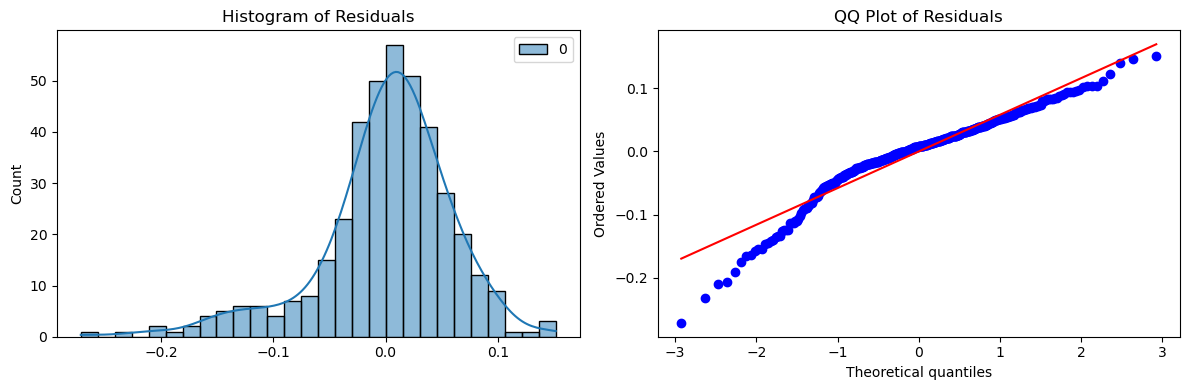

In [608]:
residuals = (y_train - y_predicted)

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram of residuals using displot
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')

# Plot QQ plot of residuals
stats.probplot(residuals.reshape(-1,), plot=axes[1])
axes[1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

## L1 regularization: Lasso 

In [609]:
train_R2_score = []
test_R2_score = []
lambdas = np.arange(0.001, 5, 0.001)

for lambda_ in lambdas:
    LassoModel = Lasso(alpha=lambda_)
    LassoModel.fit(X_train, y_train)
    trainR2 = LassoModel.score(X_train, y_train)
    testR2 = LassoModel.score(X_test, y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)

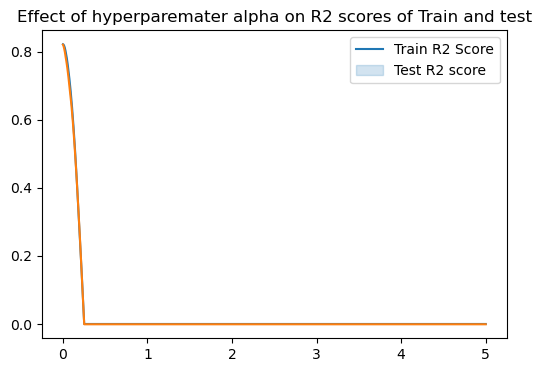

In [641]:
plt.figure(figsize = (6,4))

sns.lineplot(x=lambdas, y=train_R2_score)
sns.lineplot(x=lambdas, y=test_R2_score)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")


plt.show()

In [611]:
LassoModel = Lasso(alpha=0.001)
LassoModel.fit(X_train , y_train)
trainR2 = LassoModel.score(X_train,y_train)
testR2 = LassoModel.score(X_test,y_test)

In [612]:
trainR2,testR2

(0.82142983289567, 0.8198472607571161)

In [613]:
Lasso_Model_coefs = pd.DataFrame(LassoModel.coef_.reshape(1,-1),columns=df.columns[:-1])
Lasso_Model_coefs["Intercept"] = LassoModel.intercept_
Lasso_Model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020616,0.019069,0.006782,0.002808,0.012903,0.070605,0.009278,0.722863


In [614]:
RidgeModel_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020695,0.019296,0.00701,0.00299,0.013342,0.070449,0.009875,0.722882


In [615]:
LinearRegression_Model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


C:\Users\hp\AppData\Local\Temp\ipykernel_18660\2857349529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


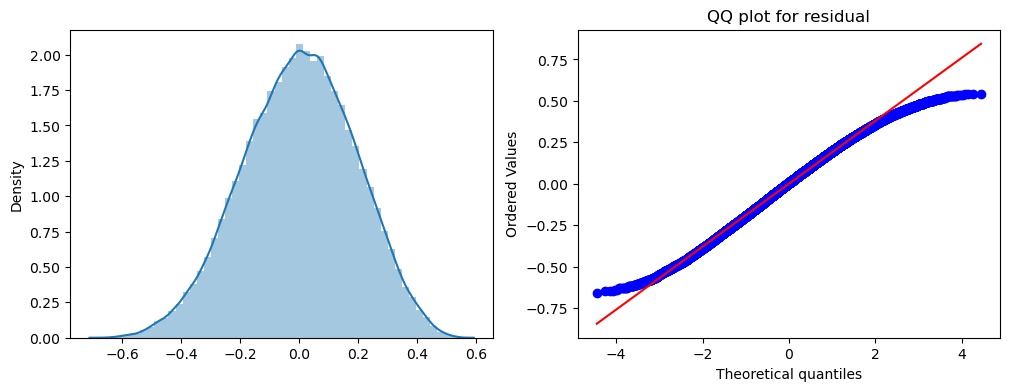

In [616]:
y_predicted = LassoModel.predict(X_train)

residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

In [617]:
y_pred = LassoModel.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.0034789295475193297
RMSE: 0.058982451182697807
MAE : 0.04022896061335951
r2_score: 0.8198472607571161
Adjusted R2 score : 0.8172841120280507


## ElasticNet
L1 and L2 regularisation :
Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models.

In [618]:
from sklearn.linear_model import ElasticNet
import numpy as np

train_R2_score = []
test_R2_score = []
lambdas = np.arange(0.001, 5, 0.001)

for lambda_ in lambdas:
    ElasticNet_model = ElasticNet(alpha=lambda_)
    ElasticNet_model.fit(X_train, y_train)
    trainR2 = ElasticNet_model.score(X_train, y_train)
    testR2 = ElasticNet_model.score(X_test, y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)

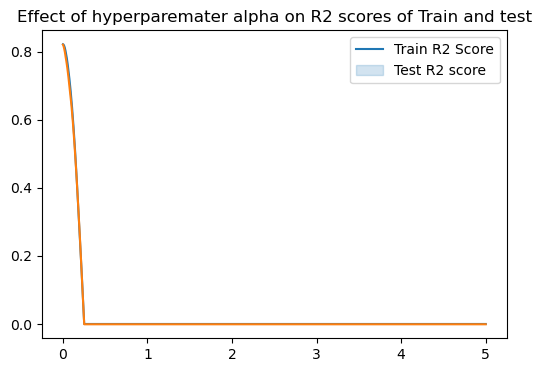

In [642]:
plt.figure(figsize = (6,4))

sns.lineplot(x=lambdas, y=train_R2_score)
sns.lineplot(x=lambdas, y=test_R2_score)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")


plt.show()

In [620]:
ElasticNet_model = ElasticNet(alpha=0.001)
ElasticNet_model.fit(X_train , y_train)
trainR2 = ElasticNet_model.score(X_train,y_train)
testR2 = ElasticNet_model.score(X_test,y_test)

In [621]:
trainR2,testR2

(0.8214893364453533, 0.8203602261096284)

C:\Users\hp\AppData\Local\Temp\ipykernel_18660\791257488.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


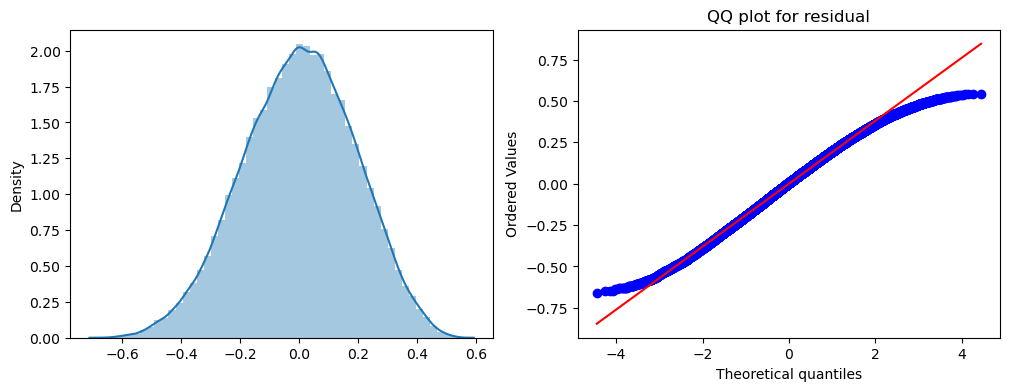

In [622]:
y_predicted = ElasticNet_model.predict(X_train)

residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

In [623]:
y_pred = ElasticNet_model.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.003469023673596966
RMSE: 0.058898418260569324
MAE : 0.04021407699792928
r2_score: 0.8203602261096284
Adjusted R2 score : 0.8178043756680987


In [624]:
ElasticNet_model_coefs = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=df.columns[:-1])
ElasticNet_model_coefs["Intercept"] = ElasticNet_model.intercept_
ElasticNet_model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020679,0.019199,0.006908,0.00292,0.013128,0.070437,0.009581,0.722873


In [625]:
RidgeModel_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020695,0.019296,0.00701,0.00299,0.013342,0.070449,0.009875,0.722882


In [626]:
Lasso_Model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020616,0.019069,0.006782,0.002808,0.012903,0.070605,0.009278,0.722863


In [627]:
LinearRegression_Model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [628]:
y_pred = ElasticNet_model.predict(X_test)
ElasticNet_model_metrics = []
ElasticNet_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
ElasticNet_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
ElasticNet_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
ElasticNet_model_metrics.append(r2_score(y_test,y_pred)) # r2score
ElasticNet_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

In [629]:
y_pred = LinearRegression.predict(X_test)
LinearRegression_model_metrics = []
LinearRegression_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LinearRegression_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LinearRegression_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LinearRegression_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LinearRegression_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

In [630]:
y_pred = RidgeModel.predict(X_test)
RidgeModel_model_metrics = []
RidgeModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
RidgeModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
RidgeModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
RidgeModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
RidgeModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

In [631]:
y_pred = LassoModel.predict(X_test)
LassoModel_model_metrics = []
LassoModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LassoModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LassoModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LassoModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LassoModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

In [632]:
ElasticNet_model_metrics

[0.003469023673596966,
 0.058898418260569324,
 0.04021407699792928,
 0.8203602261096284,
 0.8178043756680987]

In [633]:
A = pd.DataFrame([LinearRegression_model_metrics,LassoModel_model_metrics,RidgeModel_model_metrics,
                  ElasticNet_model_metrics],columns=["MSE","RMSE","MAE","R2_SCORE","ADJUSTED_R2"],
                 index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model",
                          "ElasticNet Regression Model"])
A

,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
Linear Regression Model,0.003459,0.058814,0.040200,0.820874,0.818326
Lasso Regression Model,0.003479,0.058982,0.040229,0.819847,0.817284
Ridge Regression Model,0.003459,0.058816,0.040203,0.820864,0.818315
ElasticNet Regression Model,0.003469,0.058898,0.040214,0.820360,0.817804


In [634]:
B = pd.DataFrame(LinearRegression_Model_coefs.append(Lasso_Model_coefs).append(RidgeModel_coefs).append(ElasticNet_model_coefs))
B.index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"]

C:\Users\hp\AppData\Local\Temp\ipykernel_18660\1174321538.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B = pd.DataFrame(LinearRegression_Model_coefs.append(Lasso_Model_coefs).append(RidgeModel_coefs).append(ElasticNet_model_coefs))
C:\Users\hp\AppData\Local\Temp\ipykernel_18660\1174321538.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B = pd.DataFrame(LinearRegression_Model_coefs.append(Lasso_Model_coefs).append(RidgeModel_coefs).append(ElasticNet_model_coefs))


In [635]:
REPORT = B.reset_index().merge(A.reset_index())

In [636]:
REPORT = REPORT.set_index("index")
REPORT

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
index,,,,,,,,,,,,,
Linear Regression Model,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881,0.003459,0.058814,0.040200,0.820874,0.818326
Lasso Regression Model,0.020616,0.019069,0.006782,0.002808,0.012903,0.070605,0.009278,0.722863,0.003479,0.058982,0.040229,0.819847,0.817284
Ridge Regression Model,0.020695,0.019296,0.007010,0.002990,0.013342,0.070449,0.009875,0.722882,0.003459,0.058816,0.040203,0.820864,0.818315
ElasticNet Regression Model,0.020679,0.019199,0.006908,0.002920,0.013128,0.070437,0.009581,0.722873,0.003469,0.058898,0.040214,0.820360,0.817804


# <span style='color: blue;'>Insights </span> 


* Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
* Target/Dependent Variable : Chance of Admit 
* The distribution of target variable (chances of admit) is left-skewed
* Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves
* The categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit
* Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distrubted.
* From boxplots (distribution of chance of admition (probability of getting admition) as per GRE score ) : with higher GRE score,there is high probability of getting an admition .
* Students having high toefl score , has higher probability of getting admition .
* from count plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission .
* we can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission .
* Student having research has higher chances of Admission , but also we can observe some outliers within that caregory. 


In [637]:
REPORT

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
index,,,,,,,,,,,,,
Linear Regression Model,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881,0.003459,0.058814,0.040200,0.820874,0.818326
Lasso Regression Model,0.020616,0.019069,0.006782,0.002808,0.012903,0.070605,0.009278,0.722863,0.003479,0.058982,0.040229,0.819847,0.817284
Ridge Regression Model,0.020695,0.019296,0.007010,0.002990,0.013342,0.070449,0.009875,0.722882,0.003459,0.058816,0.040203,0.820864,0.818315
ElasticNet Regression Model,0.020679,0.019199,0.006908,0.002920,0.013128,0.070437,0.009581,0.722873,0.003469,0.058898,0.040214,0.820360,0.817804


<Axes: xlabel='ElasticNet Regression Model'>

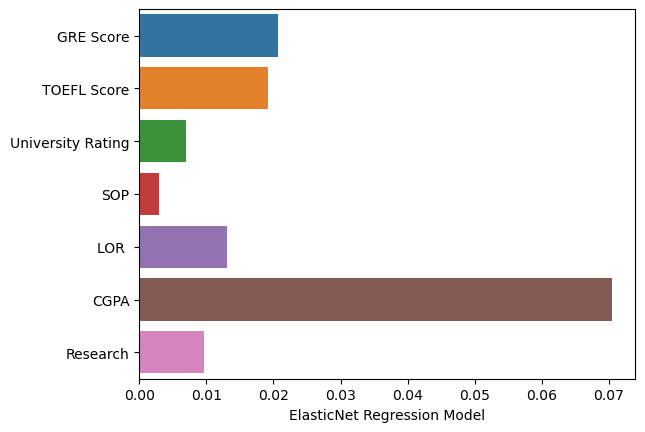

In [638]:
sns.barplot(y  = REPORT.loc["ElasticNet Regression Model"][0:7].index,
           x = REPORT.loc["ElasticNet Regression Model"][0:7])

# <span style='color: blue;'>Insights from Regression Analysis</span>

* From the regression analysis conducted (as indicated by the bar chart and REPORT file), it is evident that CGPA emerges as the most crucial feature for predicting admission chances. Additionally, significant importance is attributed to GRE and TOEFL scores.

* Regarding the predictor variables, they predominantly meet the conditions requisite for Linear Regression, although multicollinearity is apparent in the data. Notably, CGPA and Research stand out as the sole pivotal variables in predicting the Chance of Admit. While the mean of residuals approximates zero and conditions such as linearity of variables, normality of residuals, and homoscedasticity are satisfied, not all residuals exhibit perfect normal distribution. Upon observing the residual plot, some degree of heteroscedasticity becomes apparent.

* Furthermore, both regularized models, Ridge and Lasso, yield outcomes akin to the Linear Regression Model. Similarly, ElasticNet (L1+L2) also presents closely aligned results, along with other metrics across all models.

# <span style='color: blue;'>Actionable Insights and Recommendations</span>

* Educational institutions can support students not only in enhancing their CGPA scores but also in crafting compelling Letters of Recommendation (LOR) and Statements of Purpose (SOP), thereby improving their chances of admission to prestigious universities.
* Increasing awareness about CGPA and research capabilities through seminars can enhance the likelihood of admission.
* It is imperative to conduct surveys for awareness and marketing campaigns as students cannot alter their current attributes. This helps create a favorable impression on students at the undergraduate level, bolstering the company's reputation and aiding students in preparing for future endeavors.
* Implementing a dashboard for students upon logging into the website fosters healthy competition and facilitates the creation of progress reports.
*Given the high correlation among exam scores, incorporating additional independent variables is advisable for improved prediction accuracy. These variables could include work experience, internships, performance in mock interviews, involvement in extracurricular activities, or diversity factors.

# <span style='color: blue;'>Possible Model Improvement Areas</span>

* Incorporate new features such as the GRE_TOEFL_CGPA_Ratio, calculated as the ratio of GRE score, TOEFL score, and CGPA, to capture additional information.
* Explore the implementation of a non-linear model to potentially capture more complex relationships and improve predictive performance.

###### ****************End of Project ***************